<a href="https://colab.research.google.com/github/mokraneimed/TensorFlow-projects/blob/main/Iris_flowers_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/uciml/iris")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imededdinemokrane
Your Kaggle Key: ··········


100%|██████████| 3.60k/3.60k [00:00<00:00, 922kB/s]

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('iris/Iris.csv', index_col = 0)

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 5)

In [ ]:
data = data[0:100]

In [ ]:
data.shape

(100, 5)

In [ ]:
cols = data.columns
features = cols[0:4]
labels = cols[4]
print(features)
print(labels)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
Species


In [ ]:
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [ ]:
data_norm = pd.DataFrame(data)

for feature in features:
    data_norm[feature] = (data[feature] - data[feature].mean())/data[feature].std()

In [ ]:
data_norm.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,-0.6,0.9,-1.0,-1.0,Iris-setosa
2,-0.9,-0.2,-1.0,-1.0,Iris-setosa
3,-1.2,0.2,-1.1,-1.0,Iris-setosa
4,-1.4,0.0,-0.9,-1.0,Iris-setosa
5,-0.7,1.1,-1.0,-1.0,Iris-setosa


In [ ]:
data_norm.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
96,0.4,-0.2,0.9,0.7,Iris-versicolor
97,0.4,-0.4,0.9,0.9,Iris-versicolor
98,1.1,-0.4,1.0,0.9,Iris-versicolor
99,-0.6,-1.2,0.1,0.6,Iris-versicolor
100,0.4,-0.6,0.9,0.9,Iris-versicolor


In [ ]:
indices = data_norm.index.tolist()
indices = np.array(indices)
np.random.shuffle(indices)
X = data_norm.reindex(indices)[features]
y = data_norm.reindex(indices)[labels]
z =y

In [ ]:
from pandas import get_dummies
y = get_dummies(y)



In [ ]:
y


,Iris-setosa,Iris-versicolor
Id,,
53,0,1
33,1,0
23,1,0
39,1,0
94,0,1
...,...,...
87,0,1
6,1,0
4,1,0


In [ ]:
X= np.array(X).astype(np.float32)
y = np.array(y).astype(np.float32)


In [ ]:
z =np.array(z)

In [ ]:
z = (z =='Iris-setosa' ).astype(np.float32)

In [ ]:
z

array([0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.],
      dtype=float32)

In [ ]:
X.shape

(100, 4)

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=1, input_shape=(4,),
                                  activation=tf.sigmoid),)
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[ tf.keras.metrics.BinaryAccuracy(name='accuracy',threshold=0.51
                                           ),
                         
                         
                         tf.keras.metrics.Precision(
                                 name='precision' ,thresholds=0.51
                                 ),
                           tf.keras.metrics.Recall(
                              name="recall",thresholds=0.51 ),]
              
              
              )


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x=X, y=z, batch_size=1,
                      epochs=5, shuffle=True)

Epoch 1/5
100/100 [==============================] - 1s 1ms/step - loss: 0.1389 - accuracy: 0.9900 - precision: 1.0000 - recall: 0.9800
Epoch 2/5
100/100 [==============================] - 0s 1ms/step - loss: 0.1132 - accuracy: 0.9900 - precision: 1.0000 - recall: 0.9800
Epoch 3/5
100/100 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.9900 - precision: 1.0000 - recall: 0.9800
Epoch 4/5
100/100 [==============================] - 0s 2ms/step - loss: 0.0776 - accuracy: 0.9900 - precision: 1.0000 - recall: 0.9800
Epoch 5/5
100/100 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9900 - precision: 1.0000 - recall: 0.9800


In [ ]:
preds = model.predict([[-0.6,	-1.2,	0.1,	0.6		]])

In [ ]:
print(preds)

[[0.07588187]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

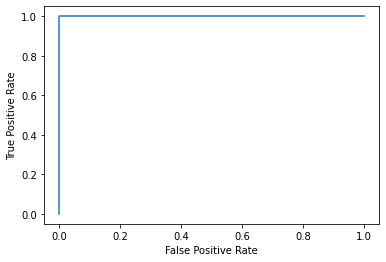

0.52712137


In [ ]:
y_pred_proba = model.predict(X)
fpr, tpr, thresholds = roc_curve(z,  y_pred_proba)
optim_index = np.argmax(tpr-fpr)
optim_thre = thresholds[optim_index]
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(optim_thre)

In [ ]:
y_pred_proba,z